# Principal Component Analysis (PCA)

Análise dos Principais Componentes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
print(iris['DESCR'])  # type:ignore

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
X = iris['data']  # type:ignore
y = iris['target']  # type:ignore

In [8]:
X.shape, y.shape

((150, 4), (150,))

In [9]:
X = StandardScaler().fit_transform(X)

In [10]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [11]:
iris['feature_names']  # type:ignore

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
pd.DataFrame(X, columns=iris['feature_names']).head()  # type:ignore

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [13]:
pca = PCA(n_components=2)

In [14]:
X.shape

(150, 4)

In [15]:
pc = pca.fit_transform(X)

In [16]:
pc.shape

(150, 2)

In [17]:
pc[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [18]:
pc[:, 0]

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

In [19]:
pc[:, 1]

array([ 0.4800266 , -0.67413356, -0.34190802, -0.59739451,  0.64683538,
        1.48917752,  0.0476442 ,  0.22314807, -1.11532768, -0.46901356,
        1.04369065,  0.13307834, -0.72867617, -0.96150673,  1.86005711,
        2.68628449,  1.48360936,  0.48883832,  1.40501879,  1.12784938,
        0.40885571,  0.92412143,  0.45834367,  0.08555853,  0.13725446,
       -0.62561859,  0.24216355,  0.52714953,  0.31321781, -0.3377319 ,
       -0.50454069,  0.42369507,  1.79357586,  2.15072788, -0.46020184,
       -0.2061074 ,  0.66155811,  0.59229277, -0.90418004,  0.26887896,
        0.44171539, -2.33741516, -0.47910069,  0.47232667,  1.14222926,
       -0.71105273,  1.1204297 , -0.38624687,  0.99795976,  0.00921636,
        0.86297242,  0.59461473,  0.61629765, -1.75440399, -0.20842105,
       -0.59328364,  0.77301931, -1.85242909,  0.03222608, -1.03401828,
       -2.65407282, -0.06329519, -1.76472438, -0.18622461, -0.43900321,
        0.50906396, -0.19631173, -0.79209574, -1.6222438 , -1.30

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
pc[y == 0, 0]

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344])

In [22]:
pc[y == 0, 1]

array([ 0.4800266 , -0.67413356, -0.34190802, -0.59739451,  0.64683538,
        1.48917752,  0.0476442 ,  0.22314807, -1.11532768, -0.46901356,
        1.04369065,  0.13307834, -0.72867617, -0.96150673,  1.86005711,
        2.68628449,  1.48360936,  0.48883832,  1.40501879,  1.12784938,
        0.40885571,  0.92412143,  0.45834367,  0.08555853,  0.13725446,
       -0.62561859,  0.24216355,  0.52714953,  0.31321781, -0.3377319 ,
       -0.50454069,  0.42369507,  1.79357586,  2.15072788, -0.46020184,
       -0.2061074 ,  0.66155811,  0.59229277, -0.90418004,  0.26887896,
        0.44171539, -2.33741516, -0.47910069,  0.47232667,  1.14222926,
       -0.71105273,  1.1204297 , -0.38624687,  0.99795976,  0.00921636])

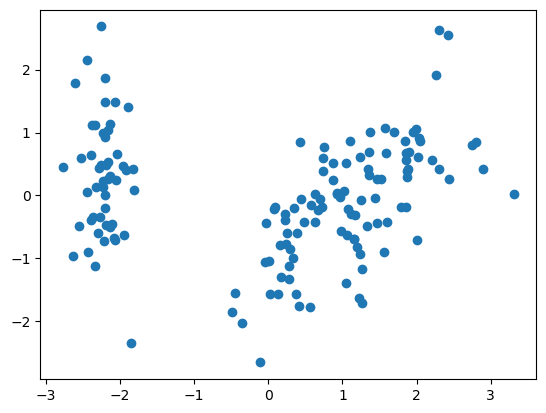

In [23]:
plt.scatter(pc[:, 0], pc[:, 1])
plt.show()

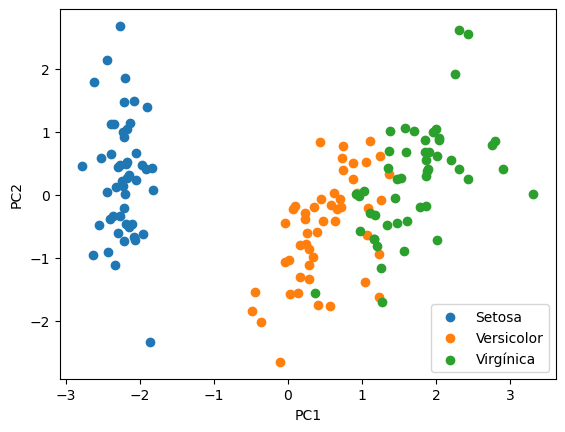

In [24]:
plt.scatter(pc[y == 0, 0], pc[y == 0, 1], label='Setosa')
plt.scatter(pc[y == 1, 0], pc[y == 1, 1], label='Versicolor')
plt.scatter(pc[y == 2, 0], pc[y == 2, 1], label='Virgínica')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [25]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [26]:
sum(pca.explained_variance_ratio_)

0.9581320720000165

# Dígitos


In [27]:
digits = datasets.load_digits()
X = digits['data']  # type:ignore
y = digits['target']  # type:ignore

In [28]:
X.shape, y.shape

((1797, 64), (1797,))

Projecting 64 dimensions in only 2D


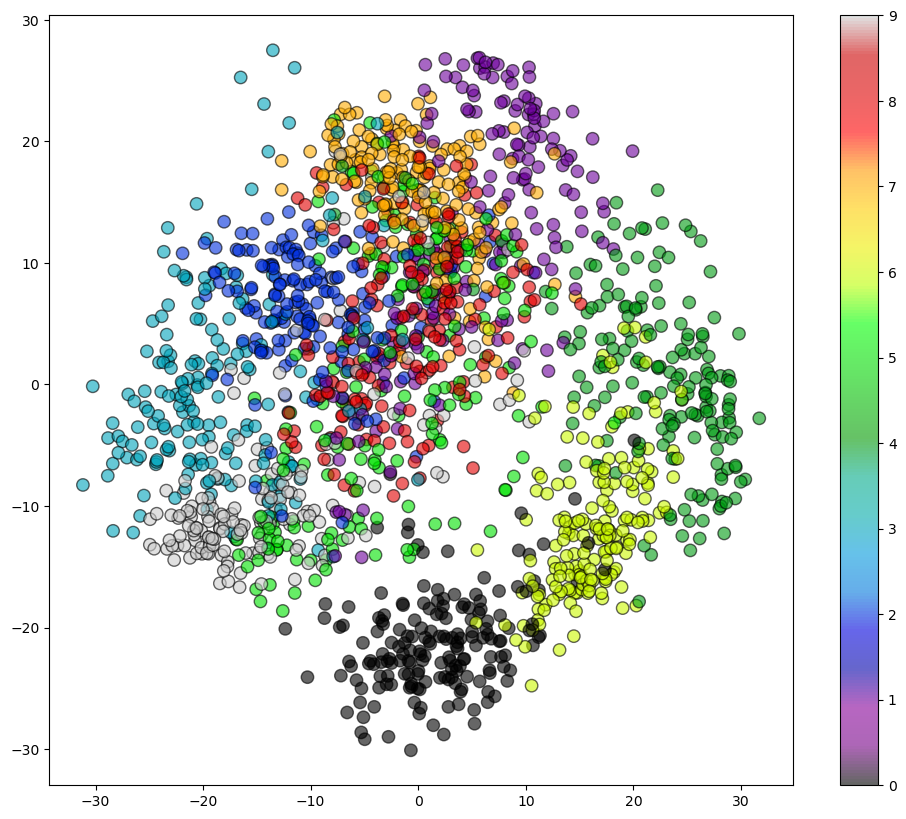

In [29]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print(f'Projecting {X.shape[1]} dimensions in only 2D')

plt.figure(figsize=(12, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='black',
            alpha=0.6, s=80, cmap=plt.colormaps['nipy_spectral'])
plt.colorbar()
plt.show()

# TSNE


In [30]:
X.shape

(1797, 64)

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=123)

X_tsne = tsne.fit_transform(X)

In [32]:
X_tsne.shape

(1797, 2)

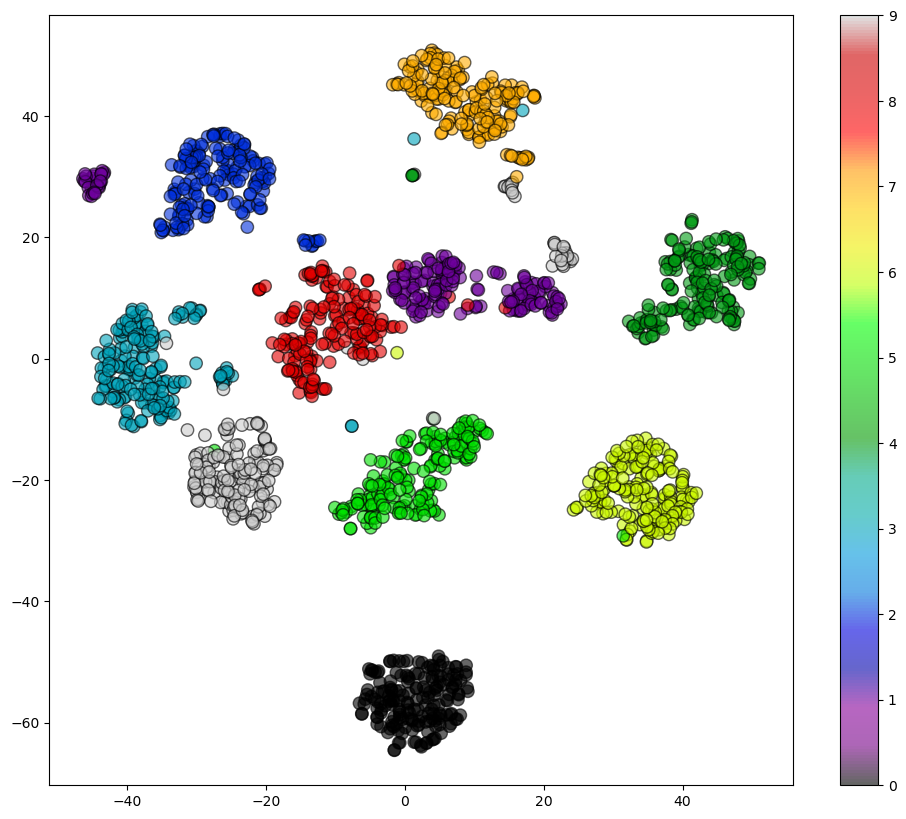

In [33]:
plt.figure(figsize=(12, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolor='black',
            alpha=0.6, s=80, cmap=plt.colormaps['nipy_spectral'])
plt.colorbar()
plt.show()

In [34]:
X.shape

(1797, 64)

In [42]:
pca = PCA(0.95)

In [43]:
pca.fit_transform(X)

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

In [44]:
pca.n_components_

29

In [45]:
np.arange(1, pca.n_components_ + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

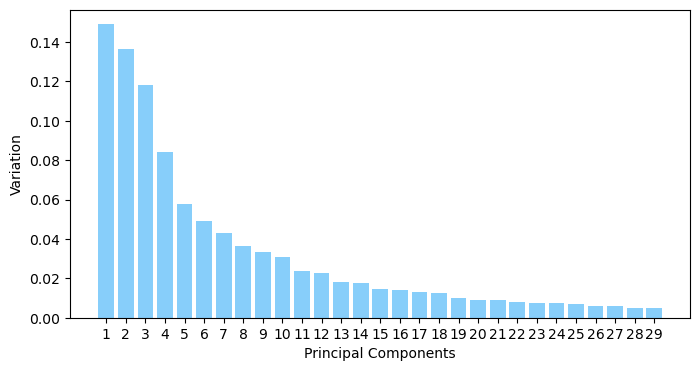

In [46]:
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_[:pca.n_components_],
        color='lightskyblue')
plt.xlabel('Principal Components')
plt.ylabel('Variation')
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.show()

Fontes:

- http://bit.ly/2NiVYCP
- http://bit.ly/34wZ7EO
